# Predicting Car Prices wit K-nearest neighbors model

Main goal of this project is to create a model that will predict car prices with two approaches:
- train/test validation
- k-fold validation

Dataset: https://archive.ics.uci.edu/ml/datasets/automobile

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv("imports-85.data", sep=",", header=None)

In [3]:
cars.columns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [4]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

First lets do some data clean up. In the documentation of the dataset there is information that N/A values are presented in data frame as '?'. 

In [6]:
cars.replace('?', np.nan, inplace=True)

Now lets check out how many null values are in columns

In [7]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

I want to predict car price value, so first I will drop all rows with no information about car price.

In [8]:
cars.dropna(subset=['price'], inplace=True)
cars['price'] = cars['price'].astype(float)

For other columns that have null values, I will change to column mean value

In [9]:
cars['normalized_losses'] = cars['normalized_losses'].astype(float)
cars['normalized_losses'] = cars['normalized_losses'].fillna(cars['normalized_losses'].mean())

In [10]:
cars['bore'] = cars['bore'].astype(float)
cars['bore'] = cars['bore'].fillna(cars['bore'].mean())

In [11]:
cars['stroke'] = cars['stroke'].astype(float)
cars['stroke'] = cars['stroke'].fillna(cars['stroke'].mean())

In [12]:
cars['horsepower'] = cars['horsepower'].astype(float)
cars['horsepower'] = cars['horsepower'].fillna(cars['horsepower'].mean())

In [13]:
cars['peak_rpm'] = cars['peak_rpm'].astype(float)
cars['peak_rpm'] = cars['peak_rpm'].fillna(cars['peak_rpm'].mean())

In [14]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Having string in column (i.e. '?'), pandas DataFrame will mark type of this column as 'object'. Even if columns is numeric. Now I got rid of '?', so I can transform approritate columns to numeric types. Based on documentation: 
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
17. engine-size: continuous from 61 to 326.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Column 'num_doors' is string column, so its not possible to change null values with column mean(). For further analisys, only numerical columns are needed and will be exctracted from current data frame.

In [15]:
num_cars_data = cars[['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']]

In [16]:
num_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  201 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    int64  
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression_ratio  201 non-null    float64
 9   horsepower         201 non-null    float64
 10  peak_rpm           201 non-null    float64
 11  city_mpg           201 non-null    int64  
 12  highway_mpg        201 non-null    int64  
 13  price              201 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 23.6 KB


Now data is cleaned, I will normalize values in range (0, 1).

In [17]:
normalized_cars_data = (num_cars_data - num_cars_data.min())/(num_cars_data.max() - num_cars_data.min())

In [18]:
normalized_cars_data['price'] = cars['price']

In [19]:
normalized_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  201 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    float64
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression_ratio  201 non-null    float64
 9   horsepower         201 non-null    float64
 10  peak_rpm           201 non-null    float64
 11  city_mpg           201 non-null    float64
 12  highway_mpg        201 non-null    float64
 13  price              201 non-null    float64
dtypes: float64(14)
memory usage: 23.6 KB


To understand cars data more, I will start with simple univariate k-nearest neighbors models and train/test validaton. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, data, k):
    # randomize data first
    data_length = len(data)
    np.random.seed(1)
    random_data_indexes = np.random.permutation(data_length)
    randomized_data = data.iloc[random_data_indexes]
    
    # split train and test data evenly - holdout validation
    train = randomized_data[:round(data_length/2)]
    test = randomized_data[round(data_length/2):]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[features], train[target])
    predictions = knn.predict(test[features])
    
    # model metric - root square mean error
    rmse = mean_squared_error(test[target], predictions)**0.5
    return rmse

Based on above function, I will experiment with model on numeric columns to get more information about data.

In [21]:
rmse_horsepower = knn_train_test(['horsepower'], ['price'], normalized_cars_data, 5)
print(rmse_horsepower)

4037.0377131537603


In [22]:
features = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

In [23]:
for feature in features:
    rmse = knn_train_test([feature], ['price'], normalized_cars_data, 5)
    print('Feature: {}, RMSE: {}'.format(feature, rmse))

Feature: normalized_losses, RMSE: 7330.197653434445
Feature: wheel_base, RMSE: 5461.553997873057
Feature: length, RMSE: 5427.2009608367125
Feature: width, RMSE: 4704.482589704386
Feature: height, RMSE: 8144.441042663747
Feature: curb_weight, RMSE: 4401.118254793124
Feature: bore, RMSE: 6780.627784685976
Feature: stroke, RMSE: 8006.529544647101
Feature: compression_ratio, RMSE: 6610.812153159129
Feature: horsepower, RMSE: 4037.0377131537603
Feature: peak_rpm, RMSE: 7697.4596964334805
Feature: city_mpg, RMSE: 4766.422505090134
Feature: highway_mpg, RMSE: 4630.026798588056


It seems that trained univariate model on features like curb_weight or horsepower or highway_mpg has got the lowest RMS error

Lets also experiment with neighbors value:

In [24]:
k_values = [1, 3, 5, 7, 9]
rmses = {}
for feature in features:
    for k in  k_values:
        rmse = knn_train_test([feature], ['price'], normalized_cars_data, k)
        if feature in rmses:
            rmses[feature].append(rmse)
        else:
            rmses[feature] = [rmse]
        print('Feature: {}, k: {}, RMSE: {}'.format(feature, k, rmse))

Feature: normalized_losses, k: 1, RMSE: 7846.750605148984
Feature: normalized_losses, k: 3, RMSE: 7500.5698123109905
Feature: normalized_losses, k: 5, RMSE: 7330.197653434445
Feature: normalized_losses, k: 7, RMSE: 7756.421586234123
Feature: normalized_losses, k: 9, RMSE: 7688.096096891432
Feature: wheel_base, k: 1, RMSE: 4493.734068810494
Feature: wheel_base, k: 3, RMSE: 5120.161506064513
Feature: wheel_base, k: 5, RMSE: 5461.553997873057
Feature: wheel_base, k: 7, RMSE: 5448.1070513823315
Feature: wheel_base, k: 9, RMSE: 5738.405685192312
Feature: length, k: 1, RMSE: 4628.45550121557
Feature: length, k: 3, RMSE: 5129.8358210721635
Feature: length, k: 5, RMSE: 5427.2009608367125
Feature: length, k: 7, RMSE: 5313.427720847974
Feature: length, k: 9, RMSE: 5383.054514833446
Feature: width, k: 1, RMSE: 4559.257297950061
Feature: width, k: 3, RMSE: 4606.413692169901
Feature: width, k: 5, RMSE: 4704.482589704386
Feature: width, k: 7, RMSE: 4571.485046194653
Feature: width, k: 9, RMSE: 4652.

In [25]:
import matplotlib.pyplot as plt

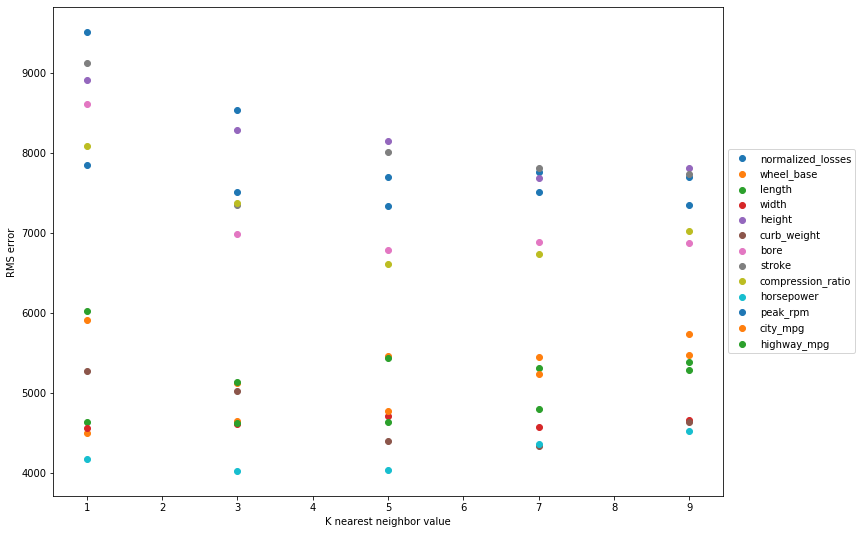

In [26]:
fig = plt.figure(figsize=(12,9))
for feature in features:
    plt.scatter(k_values, rmses[feature], label=feature)
plt.xlabel("K nearest neighbor value")
plt.ylabel("RMS error")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Now i will try to train multivariate model with k = 5.

In [27]:
k = 5
features = ["horsepower", "curb_weight"]
target = ['price']
rmse = knn_train_test(features, target, normalized_cars_data, k)
print('k: {}'.format(k))
print('Features: {}'.format(features))
print('RMSE: {}'.format(rmse))

k: 5
Features: ['horsepower', 'curb_weight']
RMSE: 3257.849049435976


In [28]:
k = 5
features = ["horsepower", "curb_weight", "highway_mpg"]
target = ["price"]
rmse = knn_train_test(features, target, normalized_cars_data, k)
print('k: {}'.format(k))
print('Features: {}'.format(features))
print('RMSE: {}'.format(rmse))

k: 5
Features: ['horsepower', 'curb_weight', 'highway_mpg']
RMSE: 3365.9110004529675


In [29]:
k = 5
features = ["horsepower", "curb_weight", "highway_mpg", "width"]
target = ["price"]
rmse = knn_train_test(features, target, normalized_cars_data, k)
print('k: {}'.format(k))
print('Features: {}'.format(features))
print('RMSE: {}'.format(rmse))

k: 5
Features: ['horsepower', 'curb_weight', 'highway_mpg', 'width']
RMSE: 3358.6915801682458


In [30]:
k = 5
features = ["horsepower", "curb_weight", "highway_mpg", "width", "wheel_base"]
target = ["price"]
rmse = knn_train_test(features, target, normalized_cars_data, k)
print('k: {}'.format(k))
print('Features: {}'.format(features))
print('RMSE: {}'.format(rmse))

k: 5
Features: ['horsepower', 'curb_weight', 'highway_mpg', 'width', 'wheel_base']
RMSE: 3688.690291866061


For k = 5, three top models with smallest RMS error:
- Features: ['horsepower', 'curb_weight', 'highway_mpg', 'width'] -> RMSE: 43.75157140035086
- Features: ['horsepower', 'curb_weight', 'highway_mpg'] -> RMSE: 45.06556280015873
- Features: ['horsepower', 'curb_weight', 'highway_mpg', 'width', 'wheel_base'] -> RMSE: 45.22307743479281

Now I will adjust hyperparameter k of above models

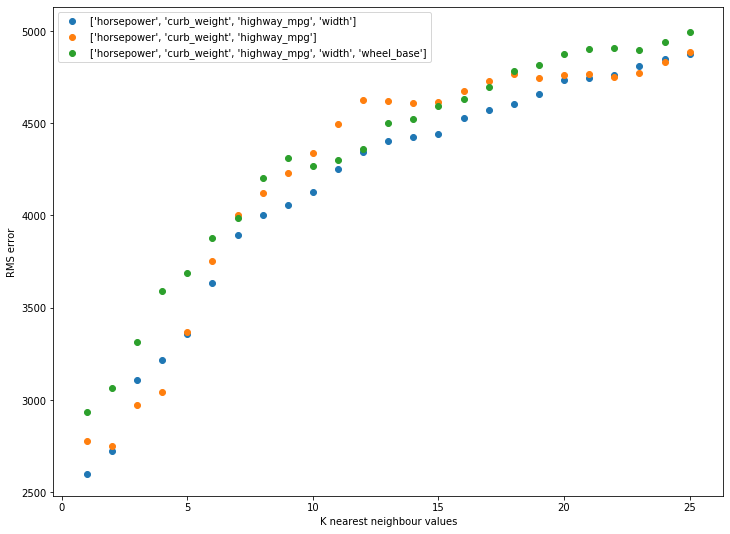

In [32]:
target = ["price"]

features_top_1 = ["horsepower", "curb_weight", "highway_mpg", "width"]
rmses_top_1 = []
k_values = [i for i in range(1,26)]
for k in k_values:
    rmse = knn_train_test(features_top_1, target, normalized_cars_data, k)
    rmses_top_1.append(rmse)
    
features_top_2 = ['horsepower', 'curb_weight', 'highway_mpg']
rmses_top_2 = []
for k in k_values:
    rmse = knn_train_test(features_top_2, target, normalized_cars_data, k)
    rmses_top_2.append(rmse)
    
features_top_3 = ['horsepower', 'curb_weight', 'highway_mpg', 'width', 'wheel_base']
rmses_top_3 = []
for k in k_values:
    rmse = knn_train_test(features_top_3, target, normalized_cars_data, k)
    rmses_top_3.append(rmse)

fig = plt.figure(figsize=(12,9))
plt.scatter(k_values, rmses_top_1, label=features_top_1)
plt.scatter(k_values, rmses_top_2, label=features_top_2)
plt.scatter(k_values, rmses_top_3, label=features_top_3)
plt.legend(loc='best')
plt.xlabel("K nearest neighbour values")
plt.ylabel("RMS error")
plt.show()

The most accurate model is:
k = 1 and
features = ["horsepower", "curb_weight", "highway_mpg", "width"]